In [1]:
#default_exp data_exploration

In [ ]:
import pandas as pd
import os
%matplotlib inline

In [2]:
DATA_DIR = 'data'

In [3]:
metadata_path = os.path.join(DATA_DIR, 'PlantCLEF2019MasterTraining.csv') 

In [4]:
df = pd.read_csv(metadata_path, sep=';')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434251 entries, 0 to 434250
Data columns (total 10 columns):
MediaId        434251 non-null object
YearInCLEF     434251 non-null object
LearnTag       434251 non-null object
ClassId        434251 non-null int64
Species        434251 non-null object
Genus          434251 non-null object
Family         434251 non-null object
Origin         434251 non-null object
OriginalUrl    434251 non-null object
BackupLink     434251 non-null object
dtypes: int64(1), object(9)
memory usage: 33.1+ MB


In [6]:
df.head()

,MediaId,YearInCLEF,LearnTag,ClassId,Species,Genus,Family,Origin,OriginalUrl,BackupLink
0,5c3e30f1706244e9f199d5a0c5a5ec00d1cbf473,PlantCLEF2019,Train,183350,Taralea oppositifolia Aubl.,Taralea,Leguminosae,microsoftimage,http://www.bing.com/cr?IG=E56D8ED3E44B4D6BB7E1...,http://otmedia.lirmm.fr/LifeCLEF/b/gu/183350/5...
1,83cead55f3be63d6fbe0c1e6c87ee2223c7a6e9b,PlantCLEF2019,Train,12254,Anacardium occidentale L.,Anacardium,Anacardiaceae,microsoftimage,http://www.bing.com/cr?IG=8DC6223C2EBC42F0A017...,http://otmedia.lirmm.fr/LifeCLEF/b/gu/12254/83...
2,1e2f13d4773a8feafb68930117d1773ba712aa79,PlantCLEF2019,Train,263952,Ischaemum muticum L.,Ischaemum,Poaceae,microsoftimage,http://www.bing.com/cr?IG=DDA2A184733547F09081...,http://otmedia.lirmm.fr/LifeCLEF/b/gu/263952/1...
3,5e49ad7196984b90ad1c5f8648fe77803b40a75b,PlantCLEF2019,Train,158247,Mezilaurus decurrens (Ducke) Kosterm.,Mezilaurus,Lauraceae,googleimage,https://encrypted-tbn0.gstatic.com/images?q=tb...,http://otmedia.lirmm.fr/LifeCLEF/b/gu/158247/5...
4,109240430bfcca5a7c3eec0fc6a165ad242e7d55,PlantCLEF2019,Train,24496,Tabernaemontana grandiflora Jacq.,Tabernaemontana,Apocynaceae,microsoftimage,https://www.bing.com/cr?IG=836545099C7F450589B...,http://otmedia.lirmm.fr/LifeCLEF/b/gu/24496/10...


In [7]:
family_counts = df['Family'].value_counts()

family_counts[family_counts > 1000].sum()

388594

In [8]:
df['Family'].value_counts()

Orchidaceae         37703
Leguminosae         30122
Poaceae             26335
Rubiaceae           16441
Malvaceae           14765
Cyperaceae          12452
Euphorbiaceae       11505
Compositae          10364
Araceae             10339
Bromeliaceae         9463
Melastomataceae      9331
Piperaceae           8177
Myrtaceae            7977
Solanaceae           7501
Apocynaceae          7450
Arecaceae            7444
Passifloraceae       7052
Lamiaceae            6389
Acanthaceae          5727
Annonaceae           5661
Bignoniaceae         5654
Convolvulaceae       5615
Lauraceae            5386
Pteridaceae          4487
Sapindaceae          4095
Lentibulariaceae     4048
Moraceae             4010
Amaranthaceae        4001
Malpighiaceae        3760
Chrysobalanaceae     3508
                    ...  
Schizaeaceae           48
Euphroniaceae          47
Ixonanthaceae          45
Putranjivaceae         45
Brunelliaceae          42
Staphyleaceae          38
Nartheciaceae          34
Sphenocleace

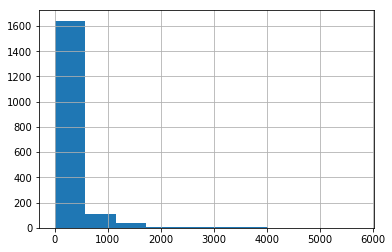

In [9]:
df['Genus'].value_counts().hist()

In [10]:
df['ClassId'].unique().shape

(10000,)

In [11]:
df['Species'].value_counts()[-2000:]

Selaginella poeppigiana (Spring) Spring ex Splitg.        6
Bonnetia tepuiensis Kobuski & Steyerm.                    6
Aechmea huebneri Harms                                    6
Phyllanthus caribaeus Urb.                                6
Epidendrum althausenii A.D.Hawkes                         6
Cordia tomentosa (Lam.) Schult.                           6
Polypodium montigenum Maxon                               6
Aristolochia consimilis Mast.                             6
Terminalia ramatuella Alwan & Stace                       6
Gunnera bogotana L.E.Mora                                 6
Licania amapaensis Prance                                 6
Costus acreanus (Loes.) Maas                              6
Micropholis trunciflora Ducke                             6
Myrcia aliena McVaugh                                     6
Blechnum gracile Kaulf.                                   6
Mouriri lunatanthera Morley                               6
Clusia hammeliana Pipoly                

In [12]:
def process_path(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [13]:
!ls data/images/data/101969

ls: cannot access 'data/images/data/101969': No such file or directory


In [14]:
# export
train_dir = 'data/images_train/data'

In [15]:
# export
from tensorflow import keras

BATCH_SIZE = 32
IMG_SHAPE = 224

In [16]:
# export
small_class_subset = [
    '101969',
    '102127',
    '102475',
    '102689',
    '102828',
    '102907',
    '103084',
    '103133',
    '103211',
    '104149'
]

In [17]:
# export
image_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               classes=small_class_subset
                                              )


Found 674 images belonging to 10 classes.


In [18]:
train_data_gen

In [19]:
list(train_data_gen.class_indices)[:10]

['101969',
 '102127',
 '102475',
 '102689',
 '102828',
 '102907',
 '103084',
 '103133',
 '103211',
 '104149']